step 0: read the documentation (or at least open it): https://l2-python-doc.readthedocs.io/en/latest/

step 0.5: install dependencies if you haven't already. (uncomment the lines below)

In [ ]:
# !pip install numpy
# !pip install matplotlib
# !pip install prettytable

step 1: imports. 

In [ ]:
from l2 import StateMachine, INF
state_machine = StateMachine()

step 2: doing the theoretical work of making the model on paper. This includes making the concepts, a graphical representation and semi-formal rules. 

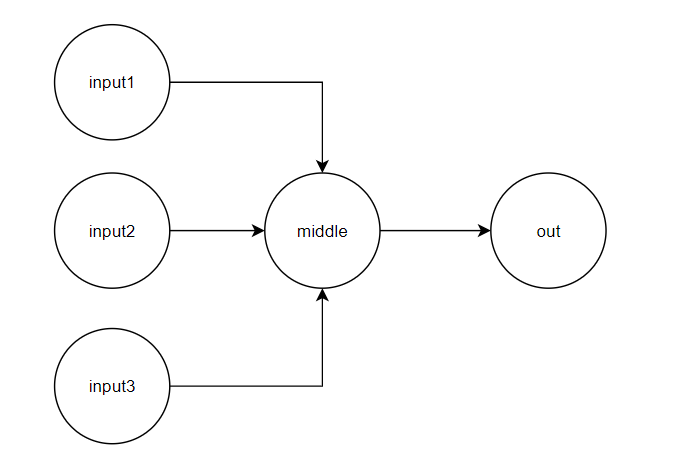

| Concept | Description of use | formalization |
| ----------- | ----------- | ----------- |
| Input1 | the first input | input1(A:Agent, A:Agent, R:Real) |
| Input2 | the second input | input2(A:Agent, A:Agent, R:Real) |
| Input3 | the third input | input3(A:Agent, A:Agent, R:Real) |
| Middle | an intermediate number | middle(A:Agent, R:Real) |
| Out | a boolean output | out(A:Agent, B:Boolean) |

Lets implement this random model with the following semi-formal rules:  
#### DDR1
<em>middle(t+dt) = input3(t) - input1(t) - input2(t) </em><br>
#### DDR2
<em>out(t+dt) = True    if middle(t) = 10 </em><br>
<em>            False else   </em><br>
    
It's a bit hard to read but basically <br> 
middle = input3 - input1 - input2 <br>
out = True if middle = 10. 

step 3: create the sorts file. Sorts are the data types that our model can use. REAL and BOOLEAN are built in.  

In [ ]:
state_machine.sorts = {
    "AGENT" :   ["arnie", "bernie", "charlie"],
}

step 4: create the predicates. Predicates is how we represent a concept in a model. It can contain any number of sorts as its values.  
Lets use multiple agents for the inputs just to make it difficult for ourselves. We are not actually going to use the second agent. 

In [ ]:
state_machine.predicates = {
"input1":  ["AGENT", "AGENT", "REAL"],
"input2":  ["AGENT", "AGENT", "REAL"],
"input3":  ["AGENT", "AGENT", "REAL"],
"middle": [ "AGENT", "REAL"],
"out":  ["AGENT", "BOOLEAN"],
}


step 5: create one or more scenarios. Scenarios give the starting values for all predicates. 
- starting nodes (that have no arrow pointing towards them) should have their values defined for the entire simulation
- calculates nodes (the ones with an arrow pointing towards them) should only have their starting value defined

In [ ]:
state_machine.scenario = [
("input1", ["arnie", "bernie", 2], [1,INF]),
("input2", ["arnie", "bernie", 3], [1,INF]),
("input3", ["arnie", "bernie", 15], [1,INF]),
("middle", ["arnie", 10], [1]),
("out",["arnie", True ],[1])
]

step 6: jeez we only just got to making the actual model?  
now it's time to implement the semi-formal rules. Every calculated node in the graph (the ones with an arrow pointing towards them) should have one and exactly one rule that computes its value (according to your semi-formal rules)
Every rule typically consists of three parts:
- fetching the required information from the previous time step
- computing the new value for the current time step
- adding the new value to the simulation log (the states)


Did you look at the documentation yet?

In [ ]:
from l2 import Predicate
# In addition, we import inspect, for debug purposes
import inspect

In [ ]:
def calculating_middle(states, t):

    # this is how we get the previous time step containing all previous predicates
    previous_state = states[t - 1]
    
    # now let's fetch the values we need. We need input 1, 2 and 3
    # we typically use a for loop since there may be multiple agents that have this predicate and they all need to be processed. 
    for agent1, agent2, input1 in previous_state.get_predicate("input1"):
        
        # we don't actually need agent2 but its good to show how it works, you could also print it
        # print(agent2)

        # now we have the first input we nee to make sure that the following searches are by the same agent
        # this searches a predicate named input2 which contains arnie as first agent
        for _,_, input2 in previous_state.get_predicate_by_agent("input2", agent1, 0):
            
            # the for loops are nested because otherwise we would lose our previous variables. 
            # we also use the _ to ignore the values in those places because we already have them
            for _,_,input3 in previous_state.get_predicate_by_agent("input3", agent1, 0):
                
                
                # finally we can calculate our new value according to our semi-formal rule (that we definitely did not change after realizing it was initially impossible to calculate with code)
                new_middle = input1 - input2 - input3
                
                
                # now that we did all that we can finally make a new predicate and return it to our state 
                # think carefully about in which for loop this bit should be
                # wowee i sure hope i did not make any mistakes
                new_predicate = Predicate("middle", [agent1], new_middle)
                states[t].add_predicate_to_state(new_predicate)



That was fun! lets make another one to procrascinate on sleeping

In [ ]:
def calculating_output(states, t):

    previous_state = states[t - 1]
    
    
    # would i still need to put comments in this rule?
    # this is the only predicate we need for calculating output
    for agent1,  middle_value in previous_state.get_predicate("middle"):
        
        
        # this rule is really weird, but thats ok because we are not actually modeling anything
        if middle_value == 10: 
        
            new_output = True
        else:
            new_output = False

        # alternatively you can use a parameter here: 
        # if middle_value == MIDDLE_TARGET:

        new_predicate = Predicate("out", [agent1], new_output)
        states[t].add_predicate_to_state(new_predicate)

step 7: you can also add any other python functions you might need. 

In [ ]:
def something(x):
    return "I don't actually need a helper function for this model"

step 8: put all your rules (not other functions) in the rules list

step 9: run the model, with or without debug mode
NOTE: this is also the place to put your parameters. 

In [ ]:
rules = [calculating_output, calculating_middle]

state_machine.rules = rules

# print(state_machine.states)

MIDDLE_TARGET = 10

state_machine.run(debug_mode=False)

from l2 import run_visualization
run_visualization(state_machine)

Final step: Check the results of your model. Are they what you expected? If you see weird behaviour, something is probably wrong! If it looks fine, you can intepret the results and report on them for the assignment. 